In [3]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from typing import List
import os
import numpy as np

In [4]:
def img_height(path: str) -> int:
    img = cv2.imread(path)
    return img.shape[0]


def img_width(path: str) -> int:
    img = cv2.imread(path)
    return img.shape[1]


def img_channels(path: str) -> int:
    img = cv2.imread(path)
    return img.shape[2]


def img_pixels(path: str) -> int:
    img = cv2.imread(path)
    return img.size

def df_mark_filter(df: pd.DataFrame, class_mark: int) -> pd.DataFrame:
    return df[df['mark'] == class_mark]


def df_dimentions_filter(df: pd.DataFrame, m_Height: int, m_Weight: int, class_mark: int) -> pd.DataFrame:
    return df[(df.mark == class_mark) & (df.height <= m_Height) & (df.width <= m_Weight)]


def df_pixel_statistics(df:pd.DataFrame, class_mark: int) -> pd.DataFrame:
    df['pixel'] = df['Path'].apply(img_pixels)
    df = df_mark_filter(df, class_mark)
    df.groupby('pixel').count()
    print(df.pixel.describe())


def create_histogram(df: pd.DataFrame, class_mark: int) -> List:
    df = df_mark_filter(df, class_mark)
    image = cv2.imread(df.sample().iloc[0]['Path'])
    color = ('b', 'g', 'r')
    result = [[], []]
    for i, col in enumerate(color):
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        result[0].append(histr)
        result[1].append(col)
    return result


def draw_histrogram(df: pd.DataFrame, class_mark: int) -> None:
    tmp = create_histogram(df, class_mark)
    for i in range(len(tmp[0])):
        plt.plot(tmp[0][i], color=tmp[1][i])
        plt.xlim([0, 256])
    plt.xlabel("Intensity")
    plt.ylabel("Number of pixels")
    plt.show()

In [8]:
df1 = pd.read_csv('Brown bear annotation', header=None)
df2 = pd.read_csv('Polar bear annotation', header=None)
df3 = pd.concat([df1, df2], ignore_index=None)
df3.drop(1, axis=1, inplace=True)
df3.rename(columns={0: 'Path', 2: 'ClassName'}, inplace=True)

data = []
for i in df3['ClassName']:
    if i == 'brown bear':
        data.append(0)
    elif i == 'polar bear':
        data.append(1)
df3.reset_index(inplace=True)
df3

,index,Path,ClassName
0,0,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear
1,1,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear
2,2,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear
3,3,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear
4,4,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear
5,5,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear
6,6,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear
7,7,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear
8,8,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear
9,9,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear


In [9]:
df3['mark'] = data
df3['height'] = df3['Path'].apply(img_height)
df3['width'] = df3['Path'].apply(img_width)
df3['channels'] = df3['Path'].apply(img_channels)

In [10]:
df3

,index,Path,ClassName,mark,height,width,channels
0,0,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear,0,320,480,3
1,1,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear,0,320,480,3
2,2,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear,0,293,480,3
3,3,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear,0,320,480,3
4,4,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear,0,320,480,3
5,5,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear,0,320,480,3
6,6,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear,0,320,408,3
7,7,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear,0,320,480,3
8,8,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear,0,300,480,3
9,9,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear,0,320,478,3


In [11]:
df3.describe()

,index,mark,height,width,channels
count,60.000000,60.000000,60.000000,60.000000,60.0
mean,14.500000,0.500000,314.100000,466.416667,3.0
std,8.728484,0.504219,11.775729,38.495561,0.0
min,0.000000,0.000000,267.000000,262.000000,3.0
25%,7.000000,0.000000,318.000000,480.000000,3.0
50%,14.500000,0.500000,320.000000,480.000000,3.0
75%,22.000000,1.000000,320.000000,480.000000,3.0
max,29.000000,1.000000,320.000000,480.000000,3.0


In [13]:
test = df_mark_filter(df3, 0)
test

,index,Path,ClassName,mark,height,width,channels
0,0,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear,0,320,480,3
1,1,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear,0,320,480,3
2,2,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear,0,293,480,3
3,3,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear,0,320,480,3
4,4,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear,0,320,480,3
5,5,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear,0,320,480,3
6,6,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear,0,320,408,3
7,7,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear,0,320,480,3
8,8,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear,0,300,480,3
9,9,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,brown bear,0,320,478,3


In [23]:
test = df_dimentions_filter(df3, 280, 480 , 1)
test

,index,Path,ClassName,mark,height,width,channels
31,1,/Users/vouchiko/Desktop/Python/CreateAnnotatio...,polar bear,1,270,480,3


In [24]:
test = df_pixel_statistics(df3, 1)
test

count        30.000000
mean     441968.000000
std       40865.022427
min      251520.000000
25%      432000.000000
50%      459360.000000
75%      460800.000000
max      460800.000000
Name: pixel, dtype: float64


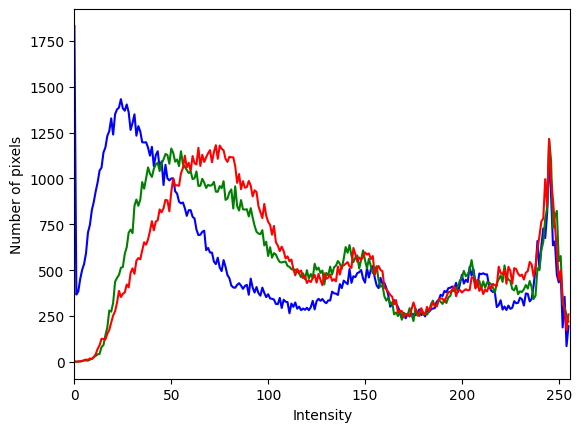

In [27]:
draw_histrogram(df3, 1)